In [9]:
## open the team table from the ncaa website

import pandas as pd
import numpy as np

# read in the team table
ncaa_df = pd.read_csv('../data/ncaa_com_fbs_fcs_table.csv')

In [10]:
ncaa_df.columns

Index(['name', 'division', 'subdivision', 'conference_id', 'conference_name',
       'reclass_year', 'reclass_division', 'reclass_subdivision', 'private',
       'historically_black', 'region', 'state'],
      dtype='object')

In [11]:
## create a simplified name column called 'team'
# copy the name column to a new column called 'team'
ncaa_df['team'] = ncaa_df['name']
# Remove any instance of 'University of' or 'College' from the name
ncaa_df['team'] = ncaa_df['team'].str.replace('University of', '')
ncaa_df['team'] = ncaa_df['team'].str.replace('University at', '')
ncaa_df['team'] = ncaa_df['team'].str.replace('College', '')
ncaa_df['team'] = ncaa_df['team'].str.replace('University', '')
# If there is a comma, remove it and everything after it
ncaa_df['team'] = ncaa_df['team'].str.replace(',', '')
# remove "The " and "the " but only if it's not at the end of the string
ncaa_df['team'] = ncaa_df['team'].str.replace('The ', '')
ncaa_df['team'] = ncaa_df['team'].str.replace('the ', '')

# strip any leading or trailing whitespace
ncaa_df['team'] = ncaa_df['team'].str.strip()
# rename columns
ncaa_df.rename(columns={'name': 'full_name'}, inplace=True)
# team to simple_name
ncaa_df.rename(columns={'team': 'simple_name'}, inplace=True)

# Unique simple names
ncaa_list = ncaa_df['simple_name'].unique()
len(ncaa_df)
# ncaa_df.head()




261

In [12]:

## Load the yearly summary stats
# read in the yearly summary stats

stats_df = pd.read_csv('../data/cfb_yearly_summary_stats.csv')

# stats_df.info()

# get a list of all of the unique team names
stats_list = stats_df['team'].unique()
len(stats_list)

1350

In [13]:
## Make some changes to the ncaa_df to make matching easier

# Tennessee-Chattanooga	Chattanooga
# Miami  (OH)	Miami (OH)
# North Carolina A&T State	North Carolina A&T
# Saint Francis  (Pennsylvania)	St. Francis (Pennsylvania)


# create a dictionary of the changes
change_dict = {'U.S. Air Force Academy': 'Air Force',
                'Alabama at Birmingham': 'Alabama-Birmingham',
                'Arkansas Fayetteville': 'Arkansas',
                'U.S. Military Academy': 'Army',
                'Austin Peay State': 'Austin Peay',
                'Boston': 'Boston University',
                'Bowling Green State': 'Bowling Green',
                'Buffalo State  New York': 'Buffalo',
                'California Polytechnic State': 'Cal Poly',
                'California Berkeley': 'California',
                'North Carolina at Charlotte': 'Charlotte',
                'Colorado Boulder': 'Colorado',

                'California State  Fresno': 'Fresno State',
                'Georgia Institute of Technology': 'Georgia Tech',
                'Hawaii Manoa': 'Hawaii',
                'of Holy Cross': 'Holy Cross',
                'Houston Christian': 'Houston Baptist',
                'Illinois Urbana-Champaign': 'Illinois',
                'Indiana  Bloomington': 'Indiana',
                'Louisiana at Lafayette': 'Lafayette',
                'Maryland  Park': 'Maryland',
                'Massachusetts Amherst': 'Massachusetts',
                'Miami  (Ohio)': 'Miami  (OH)',
                'Miami (Florida)': 'Miami (FL)',
                'Minnesota Twin Cities': 'Minnesota',
                'Missouri Columbia': 'Missouri',
                'Montana State -Bozeman': 'Montana State',
                'U.S. Naval Academy': 'Navy',
                'Nebraska Lincoln': 'Nebraska',
                'Nevada Reno': 'Nevada',
                'North Carolina Chapel Hill': 'North Carolina',
                'Pennsylvania State': 'Penn State',
                'Rutgers State  New Jersey New Brunswick': 'Rutgers',
                'California State  Sacramento': 'Sacramento State',
                'Sam Houston State': 'Sam Houston',
                'South Carolina Columbia': 'South Carolina',
                'Southern Illinois  Carbondale': 'Southern Illinois',
                'Stephen F. Austin State': 'Stephen F. Austin',
                'Tennessee Knoxville': 'Tennessee',
                'Tennessee Technological': 'Tennessee Tech',
                'Tennessee at Chattanooga': 'Tennessee-Chattanooga',
                'Tennessee at Martin': 'Tennessee-Martin',
                'Texas at Austin': 'Texas',
                'Texas A&M   Station': 'Texas A&M',
                'Texas A&M -Commerce': 'Texas A&M-Commerce',
                'Texas at El Paso': 'Texas-El Paso',
                'Texas at San Antonio': 'Texas-San Antonio',
                'California Los Angeles': 'UCLA',
                'Virginia Polytechnic Institute and State': 'Virginia Tech',
                'Wisconsin-Madison': 'Wisconsin',
                'Tennessee-Chattanooga': 'Chattanooga',
                'North Carolina A&T State':	'North Carolina A&T',
                'Saint Francis  (Pennsylvania)':	'St. Francis (Pennsylvania)',
                'Miami  (OH)':	'Miami (OH)'
                }

# replace the values in the simple_name column
ncaa_df['simple_name'].replace(change_dict, inplace=True)

# Overwrite the list of unique simple names
ncaa_list = ncaa_df['simple_name'].unique()

# save the new ncaa_df to a csv
ncaa_df.to_csv('../data/ncaa_com_fbs_fcs_table_corrected.csv', index=False)

In [14]:
import fuzzywuzzy
from fuzzywuzzy import process

# match the names from the ncaa_df to the stats_df

# create empty dictionary
match_dict = {}

# loop through the ncaa_df and find the closest match in the stats_df
for ncaa_team in ncaa_list:
    # get the closest match to the ncaa_team
    match = process.extractOne(ncaa_team, stats_list)
    # print the match
    # print(match)
    # add the match to the dictionary
    match_dict[ncaa_team] = match

# create a dataframe from the dictionary
match_df = pd.DataFrame.from_dict(match_dict, orient='index')
# name the coulmns
match_df.columns = ['yearly_name', 'score']
# copy the index into a new column
match_df['ncaa_team'] = match_df.index
# reset the index
match_df.reset_index(inplace=True)
# drop the old index
match_df.drop(columns='index', inplace=True)

<AxesSubplot:>

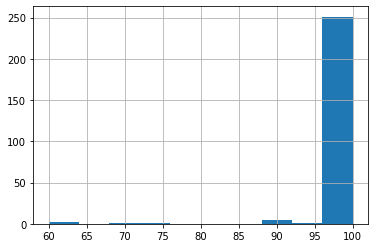

In [15]:
match_df.head()

# histogram of the scores
match_df['score'].hist()

In [16]:
# output all of the matches with a score less than 100 to csv
match_df[match_df['score'] < 100].to_csv('../TEMP/ncaa_match_df.csv', index=False)